In [1]:
# 모듈 불러오기
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import skew, kurtosis 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 캘리포니아 주택 데이터셋 로드
california = fetch_california_housing()
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseVal'] = california.target

# 'MedInc' 변수를 독립 변수로 사용
data = data[['MedInc', 'MedHouseVal']]

In [5]:
data

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422
...,...,...
20635,1.5603,0.781
20636,2.5568,0.771
20637,1.7000,0.923
20638,1.8672,0.847


# 1. 결측치 생성

In [6]:
# 임의로 결측치를 생성
np.random.seed(42)
missing_rate = 0.1 # 결측치 10%
n_ms_sample = int(np.floor(missing_rate*data.shape[0]))

In [7]:
# 만들어진 결측치 개수 확인
n_ms_sample

2064

In [8]:
#결측치를 복사한 dataframe의 MedInc 컬럼에 넣어줌
missing_samples = np.random.choice(data.index, n_ms_sample, replace=False)
data_missing = data.copy()
data_missing.loc[missing_samples, 'MedInc' ] = np.nan

In [9]:
data_missing

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,NaN,3.413
4,3.8462,3.422
...,...,...
20635,NaN,0.781
20636,2.5568,0.771
20637,1.7000,0.923
20638,1.8672,0.847


In [12]:
data_missing.isna().sum()

MedInc         2064
MedHouseVal       0
dtype: int64

# 2. 결측치 보간 방법
### 결측치 보간 방법들
- fillna(method = 'bfill') , 뒤 시점 값으로 대치 - 결측값이 연속 한 번만 대치된다.
- fillna(method = 'ffill') , 앞 시점 값으로 대치 - 동일
- interpolate(method= '') ,선형보간법

### 보간법 사용 method 참고
- 'linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 'cubicspline'

In [15]:
data_missing.loc[:10,]
# 인덱스 3에 결측값이 존재

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,NaN,3.413
4,3.8462,3.422
5,4.0368,2.697
6,3.6591,2.992
7,3.1200,2.414
8,2.0804,2.267
9,3.6912,2.611


In [18]:
# bfill: 결측값이 바로 뒤의 값과 동일하게 보간됨
data_missing.loc[:10,].fillna(method='bfill')

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,3.8462,3.413
4,3.8462,3.422
5,4.0368,2.697
6,3.6591,2.992
7,3.1200,2.414
8,2.0804,2.267
9,3.6912,2.611


In [20]:
# ffill: 결측값이 바로 앞의 값과 동일하게 보간됨
data_missing.loc[:10,].fillna(method='ffill')

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,7.2574,3.413
4,3.8462,3.422
5,4.0368,2.697
6,3.6591,2.992
7,3.1200,2.414
8,2.0804,2.267
9,3.6912,2.611


In [21]:
# 선형보간: 보간법의 디폴트
data_missing.loc[:10,].interpolate()

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.5518,3.413
4,3.8462,3.422
5,4.0368,2.697
6,3.6591,2.992
7,3.1200,2.414
8,2.0804,2.267
9,3.6912,2.611


# 3. 결측치 분포의 확인
- 결측치의 기본적인 분포-> 결측치를 어떤 식으로 처리할 수 있는지 아이디어 제공
- 기초통계치 (평균, 분산, 표준편차, 미디안) -> 결측치를 채울 수 있는 방향성을 제공
- 분포에 대한 왜도, 첨도 등으로 확인 가능 (왜도와 첨도는 결측값이 들어가 있으면 계산이 되지 않음/결측치를 제거하고 분포를 볼 수 있음)

### (1) 히스토그램

#bins: 전체 범위를 몇 개의 막대로 표현할지
plt.figure(figsize=(12,6))
sns.histplot(data['MedInc'], bins=30, kde=True, color='skyblue')

### (2) 왜도
- 비대칭성을 나타내는 지표
- 0에 가까울수록 대칭적인 분포를 의미
- 값이 커질수록 비대칭성의 증가를 의미

In [23]:
medinc_skewness = skew(data['MedInc'])
print(medinc_skewness)

1.64653702990008


### (3) 첨도
- 분포의 꼬리에 대한 두께를 나타내는 지표
- 첨도의 값이 3보다 크면 데이터에 극단적인 값이 많다는 것을 의미 

In [24]:
medinc_kurtosis = kurtosis(data['MedInc'])
print(medinc_kurtosis)

4.951033760409659


####  왼쪽으로 치우쳐 있고, 극단값이 많이 존재
-> 일부 매우 높은 소득 존재하여 전체 영향을 준다는 의미로 해석
#### 이상치가 존재하므로 이상치의 영향을 덜 받는 보간법으로 진행
->중앙값이 상대적으로 이상치에 영향 덜 받음

# 4. 결측치 대치 후 성능 평가

In [26]:
# 평균으로 대치
data_mean_imputed = data_missing.copy()
mean_value = data_mean_imputed['MedInc'].mean()
data_mean_imputed['MedInc'] = data_mean_imputed['MedInc'].fillna(mean_value)

In [27]:
# 0값으로 대치 
data_zero_imputed = data_missing.copy()
data_zero_imputed['MedInc'] = data_zero_imputed['MedInc'].fillna(0)

In [28]:
# 선형보간
data_linear_interpolated = data_missing.copy()
data_linear_interpolated['MedInc'] = data_linear_interpolated['MedInc'].interpolate()

In [29]:
# 결측치 시각화 함수
# plot_comp(원본 데이터 프레임, 결측치를 대치한 데이터 프레임, 대치 방법)

def plot_comp(original, imputed, method):
    plt.figure(figsize=(10, 6))
    plt.plot(original.index, original['MedInc'], 'o', label='Original', alpha=0.3)
    plt.plot(imputed.index, imputed['MedInc'], 'o', label=f'Imputed ({method})', alpha=0.3)
    plt.xlabel('Index')
    plt.ylabel('MedInc')
    plt.legend()
    plt.show()

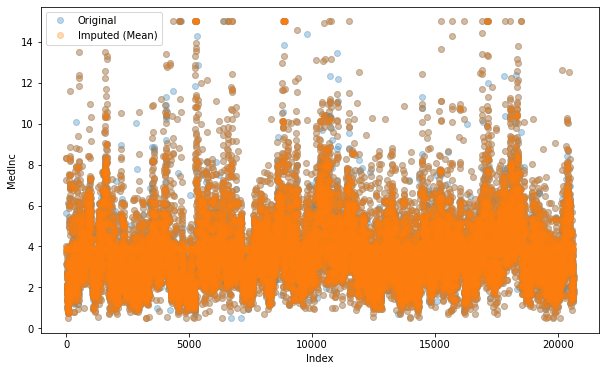

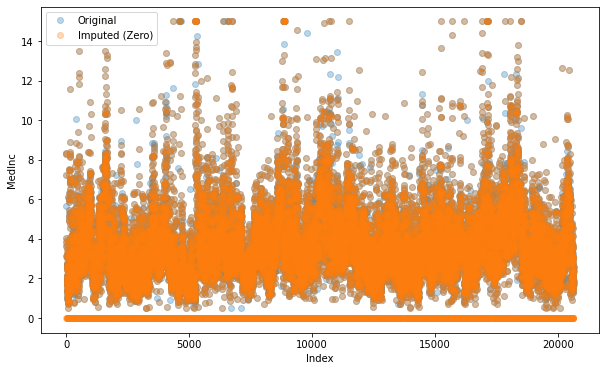

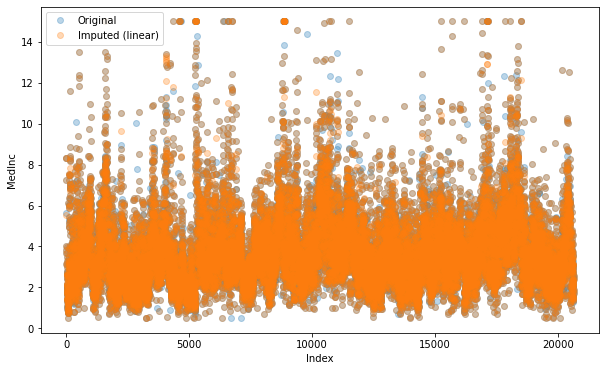

In [30]:
# 결측치 시각화
plot_comp(data, data_mean_imputed, 'Mean')
plot_comp(data, data_zero_imputed, 'Zero')
plot_comp(data, data_linear_interpolated, 'linear')

### 실제 성능 비교
- 3가지 방법으로 결측치를 대치한 데이터로 선형회귀 분석을 진행해서 성능이 얼마나 나오는지 확인
- train, test 데이터를 7:3 으로 각각 나눠 이 데이터셋으로 학습하여 데이터를 예측하여 평가함
- y값은 기존에 존재,결측치를 대치하여 만든 데이터로 예측한 값과 비교
- 회귀분석을 통해서 MSE 측정

In [31]:
# 함수 만들기
def per_reg(data, label):
    X = data[['MedInc']]
    y = data['MedHouseVal']
    
    reg = LinearRegression().fit(X, y) # 선형 회귀모형으로 학습
    y_pred = reg.predict(X) # 예측
    mse = mean_squared_error(y, y_pred) # 실제값, 예측값으로 MSE 측정
    
    return y_pred, mse, reg.coef_[0], reg.intercept_  # 예측값, MSE, 계수, 상수 반환

In [32]:
# 결측치를 대치한 데이터로 예측하여서 비교
y_pred_mean, mse_mean, coef_mean, intercept_mean = per_reg(data_mean_imputed, 'Mean Imputation')
y_pred_zero, mse_zero, coef_zero, intercept_zero = per_reg(data_zero_imputed, 'Zero Imputation')
y_pred_linear, mse_linear, coef_linear, intercept_linear = per_reg(data_linear_interpolated, 'linear Imputation')

### MSE
- MSE가 가장 낮아야 성능이 좋음
- 실제값과 예측값 간 차이가 적을수록 성능이 좋음
- 예시: 실제값 5 - 예측값 4 = 1, 실제값 5 - 예측값 3 = 2가 있을 때 첫 번째 예측값이 더 잘 맞았음
-  예측값- 실제값 = 잔차 

In [34]:
# MSE로 성과 비교
print(f'Mean Imputation -MSE: {mse_mean}')
print(f'zero Imputation -MSE: {mse_zero}')
print(f'Linear Imputation -MSE: {mse_linear}')

Mean Imputation -MSE: 0.7614520509063427
zero Imputation -MSE: 0.9296910233890502
Linear Imputation -MSE: 0.7042327660288281


In [35]:
# 예측 결과 시각화 함수 
# plot_comp(원본 데이터 프레임, 결측값을 대치한 데이터 프레임, 예측값, 계수, 상수, 결측값 대치 방법)
def plot_comp(original, imputed, y_pred, coef, intercept, method):
    plt.figure(figsize=(10,6))
    sns.scatterplot(x='MedInc', y='MedHouseVal', data=original, label='Actual Values', alpha=0.3, color='blue')
    sns.scatterplot(x='MedInc', y='MedHouseVal', data=imputed, label=f'Imputed ({method})', alpha=0.3, color='red')
    plt.plot(imputed['MedInc'], y_pred, 'o', color='green', label='Predicted Values', alpha=0.3)
    plt.plot(imputed['MedInc'], coef*imputed['MedInc'] + intercept, color = 'orange', label='Regression Line')
    plt.xlabel('MedInc')
    plt.ylabel('MedHouseVal')
    plt.legend()
    plt.show()

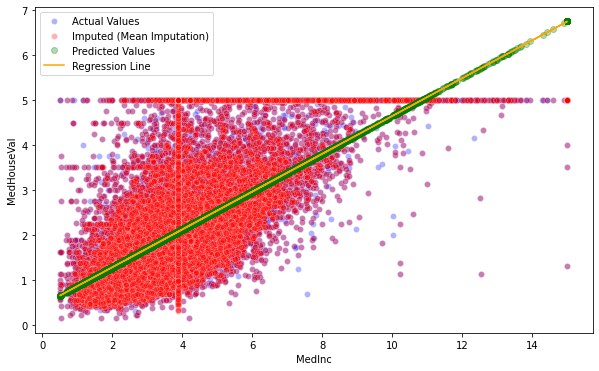

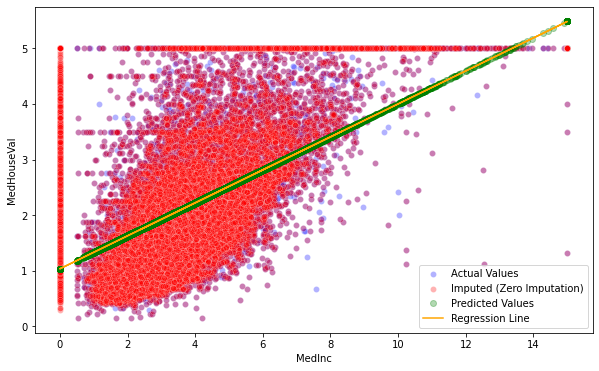

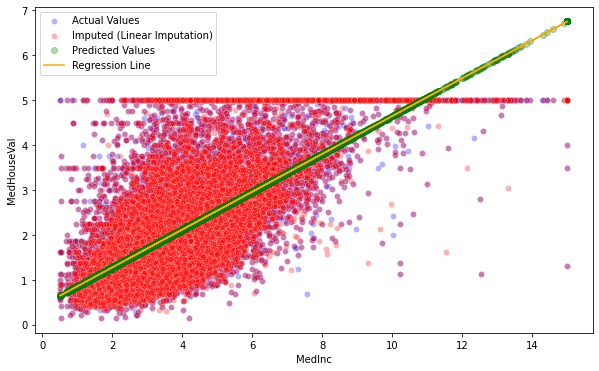

In [36]:
# 예측 결과 시각화
plot_comp(data, data_mean_imputed, y_pred_mean, coef_mean, intercept_mean, 'Mean Imputation')
plot_comp(data, data_zero_imputed, y_pred_zero, coef_zero, intercept_zero, 'Zero Imputation')
plot_comp(data, data_linear_interpolated, y_pred_linear, coef_linear, intercept_linear, 'Linear Imputation')